In [1]:
from src.main import *
import matplotlib.pyplot as plt
import numpy as np


In [2]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)

report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [3]:
reports = [
    report_11, report_12, report_13, report_14, report_15,
    report_16, report_17, report_18, report_19, report_20
]


def batch_fn(inject, **args):
    for report in reports:
        inject(report, **args)


In [4]:
def get_network_scale_review():
    lines = []
    for report in reports:
        lines.append({
            'year': report.name,
            'nodes': len(report.net._G.nodes),
            'scale of connetct components': [len(i) for i in nx.weakly_connected_components(report.net._G)]
        })

    
    write_to_excel(pd.DataFrame(lines), 'excel/net_overview.xlsx')

get_network_scale_review()



In [5]:
def view_subgraph():
    for report in reports:
        subgraphs = [g for g in nx.weakly_connected_components(report.G)]
        if len(subgraphs) > 1:
            for i in range(1, len(subgraphs)):
                print(subgraphs[i])

view_subgraph()

In [6]:
def get_network_indexs():
    lines = []
    for report in reports:
        lines.append({
            'year': report.name,
            'nodes': len(report.G.nodes),
            'average degree': np.array(list(dict(report.G.degree).values())).mean(),
            'average strength': np.array(list(dict(report.G.degree(weight="weight")).values())).mean()/1000000,
            'export': np.array(list(dict(report.G.degree(weight="weight")).values())).sum()/1000000,
            'clustering': nx.average_clustering(report.G),
            'path length': nx.average_shortest_path_length(report.G),
            'scale of connetct components': [len(i) for i in nx.weakly_connected_components(report.G)]
        })
    
    return lines

lines = get_network_indexs()
lines = pd.DataFrame(lines)
print(lines)
# write_to_excel(lines, 'excel/net_detail.xlsx')


   year  nodes  average degree  average strength        export  clustering  path length scale of connetct components
0  2011    120       10.233333        471.992258  56639.070920    0.286078     1.697129                        [120]
1  2012    124       10.403226        286.453829  35520.274738    0.251577     1.588710                        [124]
2  2013    121       10.942149        345.931148  41857.668957    0.301089     1.674656                        [121]
3  2014    119       10.722689        363.025279  43200.008182    0.306924     1.758297                        [119]
4  2015    121       10.628099        384.211060  46489.538308    0.285224     1.643251                        [121]
5  2016    109       11.339450        534.289330  58237.536974    0.270551     1.612300                        [109]
6  2017    121       10.330579        512.677876  62034.022982    0.282779     1.664118                        [121]
7  2018    122       10.016393        528.926370  64529.017084  

In [7]:
"""
for report in reports:
    write_to_excel(report.data_overview(), 'excel/' +
                   report.name + '_copper_2063_trade.xlsx')
"""


"\nfor report in reports:\n    write_to_excel(report.data_overview(), 'excel/' +\n                   report.name + '_copper_2063_trade.xlsx')\n"

In [8]:
# report_20.net.draw()



In [9]:
overview = report_11.data_overview()
# write_to_excel(overview, 'excel/t1_data_overview_16.xlsx')
overview


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
1,8,Albania,156,China,Export,13244524,10912650.0,10912650.0
2,8,Albania,792,Turkey,Export,28169884,20568660.0,20568660.0
3,12,Algeria,156,China,Export,550,105.0,105.0
4,24,Angola,826,United Kingdom,Import,51,1.0,1.0
5,32,Argentina,68,Bolivia (Plurinational State of),Import,288092,5310000.0,5310000.0
...,...,...,...,...,...,...,...,...
815,894,Zambia,757,Switzerland,Export,3228272,3738141.0,3738141.0
816,894,Zambia,784,United Arab Emirates,Export,40,1.0,1.0
817,894,Zambia,826,United Kingdom,Export,1193,862.0,862.0
818,894,Zambia,842,USA,Import,902,7.0,7.0


In [10]:
def get_bigest_BC(G):
    betweenness_centralities = nx.betweenness_centrality(G)
    return sorted(G.nodes, key=lambda node: betweenness_centralities[node])[-1]


In [11]:
def get_bigest_DC(G):
    degree_centralities = nx.degree_centrality(G)
    return sorted(G.nodes, key=lambda node: degree_centralities[node])[-1]


In [12]:
def get_bigest_CC(G):
    closeness_centralities = nx.closeness_centrality(G)
    return sorted(G.nodes, key=lambda node: closeness_centralities[node])[-1]

In [13]:
def get_bigest_IS(G):
    in_strengths = G.in_degree(weight="weight")
    return sorted(G.nodes, key=lambda node: in_strengths[node])[-1]

In [14]:
def get_bigest_OS(G):
    out_strengths = G.out_degree(weight="weight")
    return sorted(G.nodes, key=lambda node: out_strengths[node])[-1]

In [15]:
def get_bigest_E(G):
    Es = Net.getAdjacencyEntropies(G)

    return sorted(G.nodes, key=lambda node: Es[node])[-1]

In [16]:
get_bigest_E(report_11.G)

156

In [17]:
def removeTest(report):

    fig, axes = plt.subplots()

    x = np.arange(len(report.G.nodes)) / len(report.G.nodes)

    y = Net.removeTest(report.G, to_remove=get_bigest_BC)
    axes.plot(x, y, label='BC')
    y = Net.removeTest(report.G, to_remove=get_bigest_DC)
    axes.plot(x, y, label='DC')
    y = Net.removeTest(report.G, to_remove=get_bigest_CC)
    axes.plot(x, y, label='CC')
    '''
    y = Net.removeTest(report.G, to_remove=get_bigest_IS)
    axes.plot(x, y, label='IS')
    y = Net.removeTest(report.G, to_remove=get_bigest_OS)
    axes.plot(x, y, label='OS')
    '''
    y = Net.removeTest(report.G, to_remove=get_bigest_E)
    axes.plot(x, y, label='E')

    '''
    indexs = ['BC', 'CC', 'DC', 'E']

    for index in indexs:

        sorted_nodes = sorted(
            report.nodes, key=lambda e: e[index], reverse=True)
        x = [item['code'] for item in sorted_nodes]
        y = report.net.removeTest(report.G, to_remove=)

        axes.plot(np.arange(len(x)+1), y, label=index)
    '''

    axes.legend()
    plt.show()


In [18]:
nodes_sort_by_BC = sorted(report_11.nodes, key=lambda e: e['BC'], reverse=True)
series_BC = [item["code"] for item in nodes_sort_by_BC]

nodes_sort_by_DC = sorted(report_11.nodes, key=lambda e: e['DC'], reverse=True)
series_DC = [item["code"] for item in nodes_sort_by_DC]

nodes_sort_by_CC = sorted(report_11.nodes, key=lambda e: e['CC'], reverse=True)
series_CC = [item["code"] for item in nodes_sort_by_CC]


In [19]:
def rank_analys():
    mat = np.zeros((len(reports), 10), dtype='int')
    for i, report in enumerate(reports):
        nodes = report.net.sortedNodes[:10]
        mat[i, :] = [node['code'] for node in nodes]

    nodes = mat.ravel()

    def sort_nodes():
        nodes_set = set(mat.ravel())
        nodes_score = {}
        for node in nodes_set:
            nodes_score[node] = 0
        for line in mat:
            for i, node in enumerate(line):
                nodes_score[node] += 10 - i

        sorted_nodes = sorted(list(zip(nodes_score.keys(), nodes_score.values())), key=lambda i:i[1], reverse=True)
        return [item[0] for item in sorted_nodes]

    sorted_nodes = sort_nodes()

    ys = []
    for n in sorted_nodes:
        ys.append((n, list(nodes).count(n)))
    ys = sorted(ys, key=lambda item: item[1], reverse=True)
    fig, axe = plt.subplots(figsize=(10,4))
    axe.bar(np.arange(len(ys)), [item[1] for item in ys], color="#012E6B")
    x_labels = [report_11.net.countries[str(item[0])] for item in ys]
    sorted_nodes = [report_11.net.countries[str(item[0])] for item in ys]
    axe.spines[['right', 'top']].set_visible(False)

    axe.set_xticks(np.arange(len(ys)))
    axe.set_xticklabels(x_labels, rotation="45", ha="right", va="top")

    axe.set_ylabel('number of top 10')

    plt.savefig('c3.svg', format="svg", bbox_inches="tight")
    plt.show()
    
    from textwrap import fill


    def draw_entropy_map(slice=10):

        fig, axe = plt.subplots(figsize=(20, 10))

        axe.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

        data = np.zeros((len(reports),slice))
        for i in range(len(reports)):
            for j in range(slice):
                c_name = report.net.countries[str(
                    mat[i, j])]
                data[i,j] = sorted_nodes.index(c_name)
                axe.text(j, i, fill(c_name, width=11), ha="center", va="center", color="w")
        axe.imshow(data, cmap="cividis")
        axe.set_xticks(np.arange(slice))
        axe.set_yticks(np.arange(len(reports)))
        axe.set_xticklabels(np.arange(1, slice+1))
        axe.set_yticklabels([report.name for report in reports])

        plt.savefig('c4.svg', format="svg", bbox_inches="tight")
        plt.show()


    draw_entropy_map()

# rank_analys()



In [20]:
def draw_entropy_plots(slice=None):
    fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(10, 10))
    y_label = "E"

    for i, report in enumerate(reports):
        nodes = report.net.sortedNodes
        x = np.arange(len(nodes)) + 1
        y = [node['E'] for node in nodes]

        r = int(i / 2)
        c = i - r * 2

        if slice is None:
            axes[r, c].plot(x, y, '.-', label=report.name, color="#012E6B")
        else:
            axes[r, c].plot(x[slice[0]: slice[1]], y[slice[0]: slice[1]],
                            '.-', label=report.name, color="#012E6B")

        # axes[r,c].set_title(report.name)

    for axe in axes.ravel():
        axe.spines['right'].set_visible(False)
        axe.spines['top'].set_visible(False)
        axe.legend()
        axe.set_xlabel('n')
        axe.set_ylabel(y_label)
        axe.set_xlim(0, None)
        axe.set_ylim(0, 26)

    # plt.title('图2 2011-2020 年全球铜贸易网络节点的脆弱性指标（前50名）', y=-0.3, size=11)

    plt.savefig('c2.svg', format="svg", bbox_inches="tight")
    plt.show()


# draw_entropy_plots([0, 50])


In [21]:
table_entropy_cluster = show_cluster_list(reports)
table_entropy_cluster
write_to_excel(table_entropy_cluster, 'excel/entropy_cluster.xlsx')


In [22]:
nodes_attribute_20 = report_20.show_nodes_attribute()
nodes_attribute_20
write_to_excel(nodes_attribute_20, 'excel/t2_attributes_2020.xlsx')


In [23]:
for report in reports:
    report.set_attribute_probability()


In [24]:
for report in reports:
    # report.show_dt_accuracy()
    # report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')
    for _report in reports:
        res = ID3.checkPrecesion(
            _report.nodes, report.decision_tree) / len(_report.nodes)
        print(report.name + " - " + _report.name + ": " + str(res))


2011 - 2011: 1.0
2011 - 2012: 0.7741935483870968
2011 - 2013: 0.6942148760330579
2011 - 2014: 0.6974789915966386
2011 - 2015: 0.71900826446281
2011 - 2016: 0.7614678899082569
2011 - 2017: 0.6198347107438017
2011 - 2018: 0.7295081967213115
2011 - 2019: 0.7636363636363637
2011 - 2020: 0.6698113207547169
2012 - 2011: 0.8833333333333333
2012 - 2012: 1.0
2012 - 2013: 0.9173553719008265
2012 - 2014: 0.9411764705882353
2012 - 2015: 0.859504132231405
2012 - 2016: 0.8440366972477065
2012 - 2017: 0.9338842975206612
2012 - 2018: 0.9262295081967213
2012 - 2019: 0.9
2012 - 2020: 0.7547169811320755
2013 - 2011: 0.9
2013 - 2012: 0.9032258064516129
2013 - 2013: 1.0
2013 - 2014: 0.9159663865546218
2013 - 2015: 0.8925619834710744
2013 - 2016: 0.8715596330275229
2013 - 2017: 0.9090909090909091
2013 - 2018: 0.9344262295081968
2013 - 2019: 0.8909090909090909
2013 - 2020: 0.7641509433962265
2014 - 2011: 0.875
2014 - 2012: 0.9274193548387096
2014 - 2013: 0.9173553719008265
2014 - 2014: 1.0
2014 - 2015: 0.876

In [25]:
Es = get_all_E(reports)

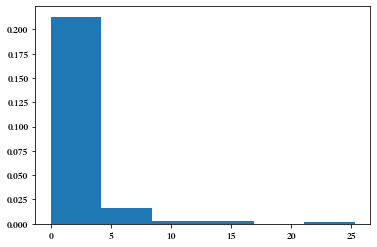

In [26]:
fig, axes = plt.subplots()
n, bins, pathces = axes.hist(Es, 6, density=True)
plt.show()

In [27]:
for report in reports:
    decision_list = pd.DataFrame(report.decision_list)[
        report.attribute_names + ['label', 'p']]\
        .sort_values('p')\
        .reset_index(drop=True)

    print(decision_list[-5:-1])

#write_to_excel(decision_list_20, 'excel/t4_decision_list_2020.xlsx')


KeyError: "['BC'] not in index"

In [28]:
decision_attribute_distribute = get_decision_attribute_distribute(reports)
# write_to_excel(decision_attribute_distribute, 'excel/t5_decision_attribute_distribute.xlsx')
decision_attribute_distribute


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IS,0.478261,0.739130,0.804348,0.611111,0.682927,0.611111,0.638889,0.653846,0.682927,0.704225
OS,0.739130,0.826087,0.782609,0.500000,0.536585,0.777778,0.166667,0.653846,0.439024,0.690141
DC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
BC,0.000000,0.130435,0.000000,0.444444,0.146341,0.166667,0.611111,0.000000,0.000000,0.084507
CC,0.369565,0.000000,0.000000,0.000000,0.146341,0.000000,0.000000,0.000000,0.268293,0.535211


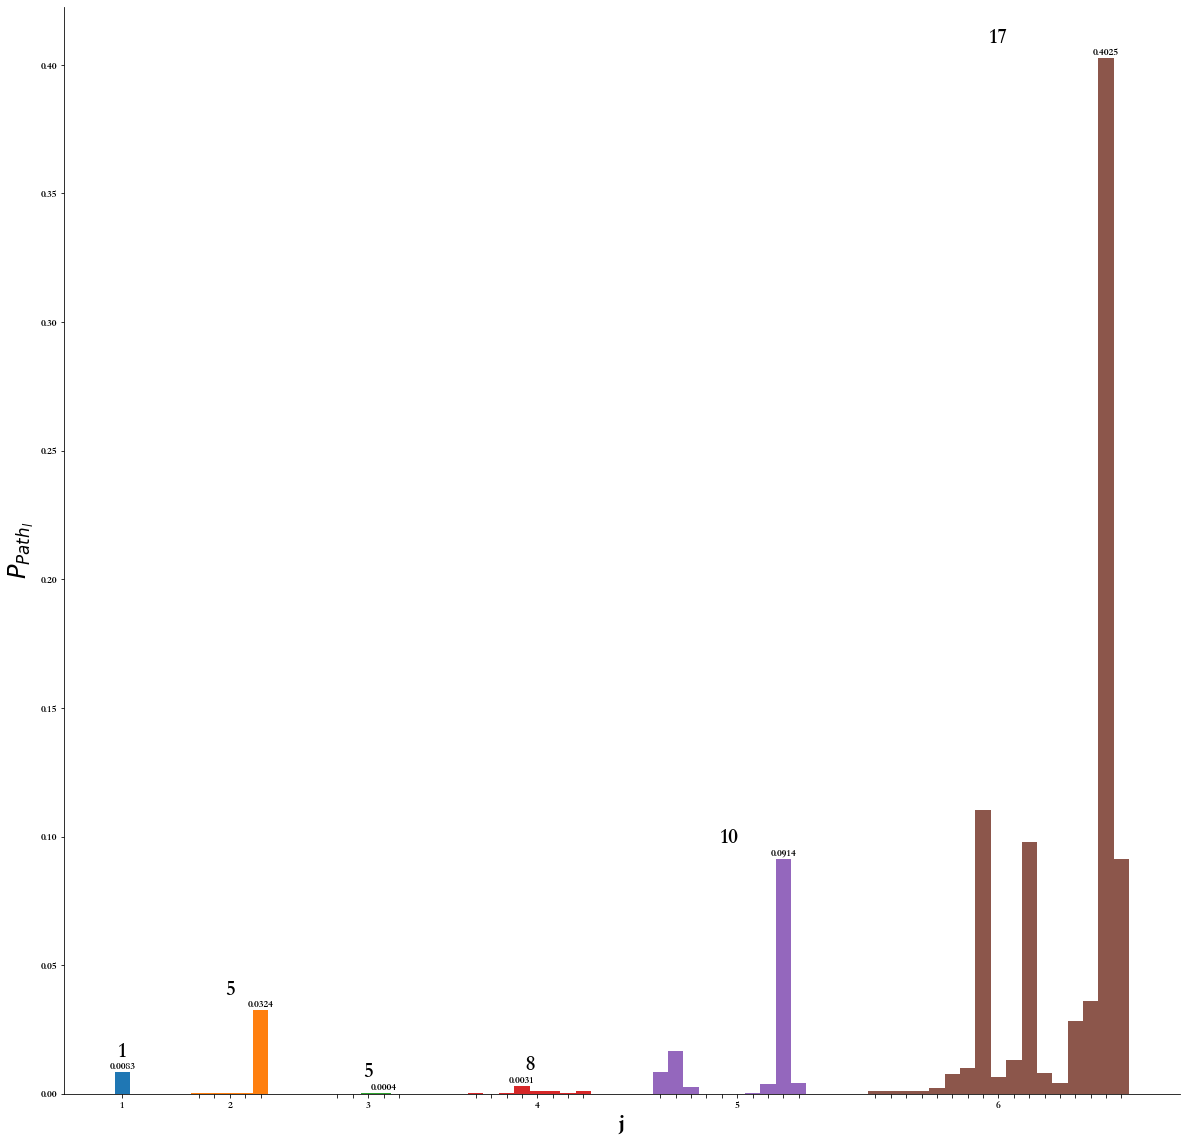

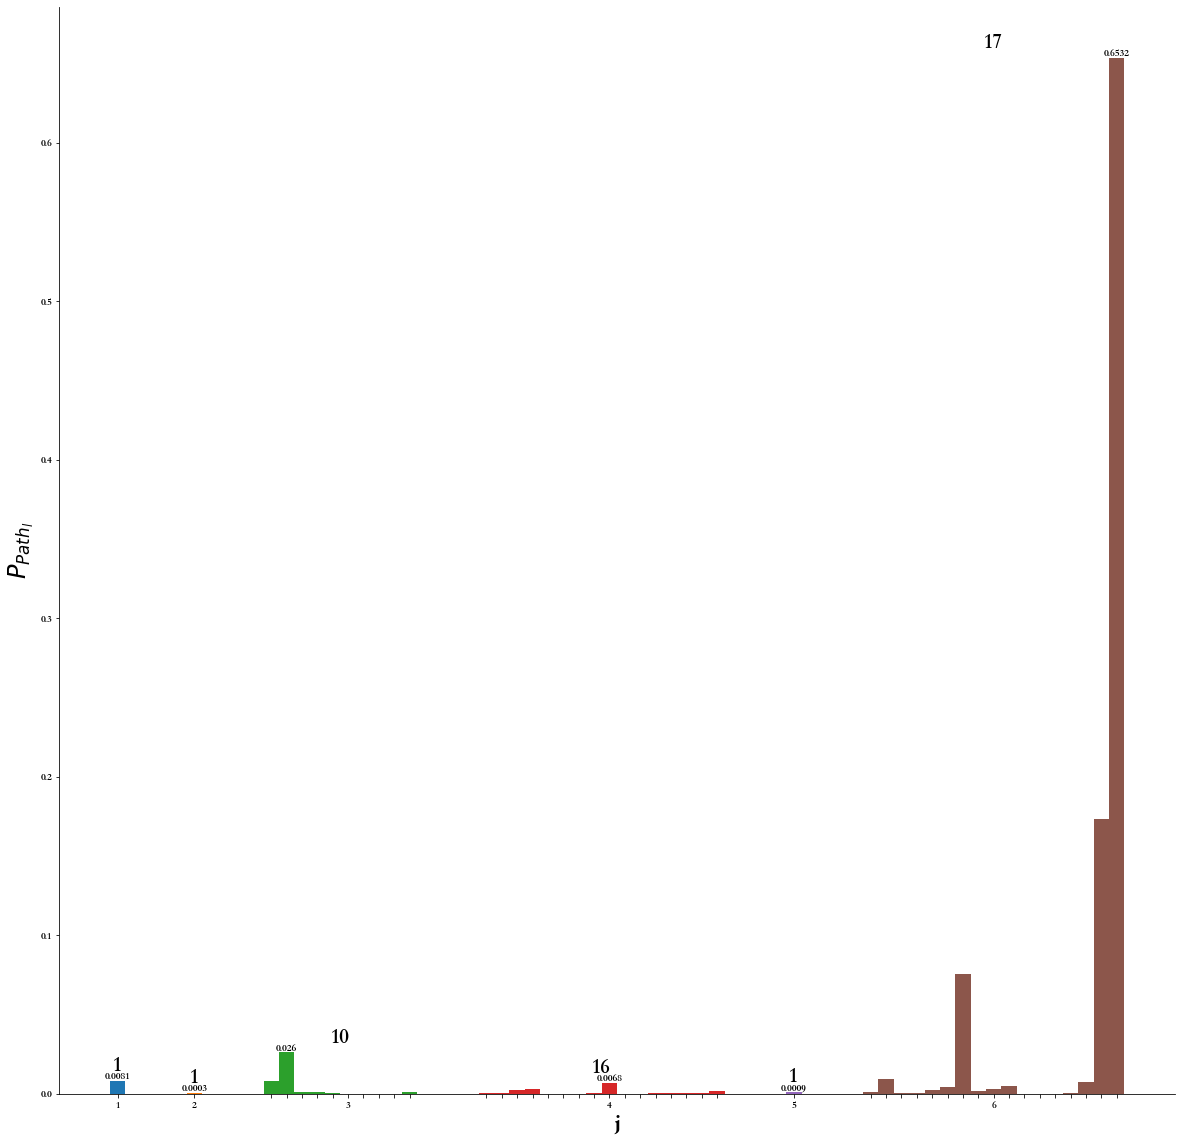

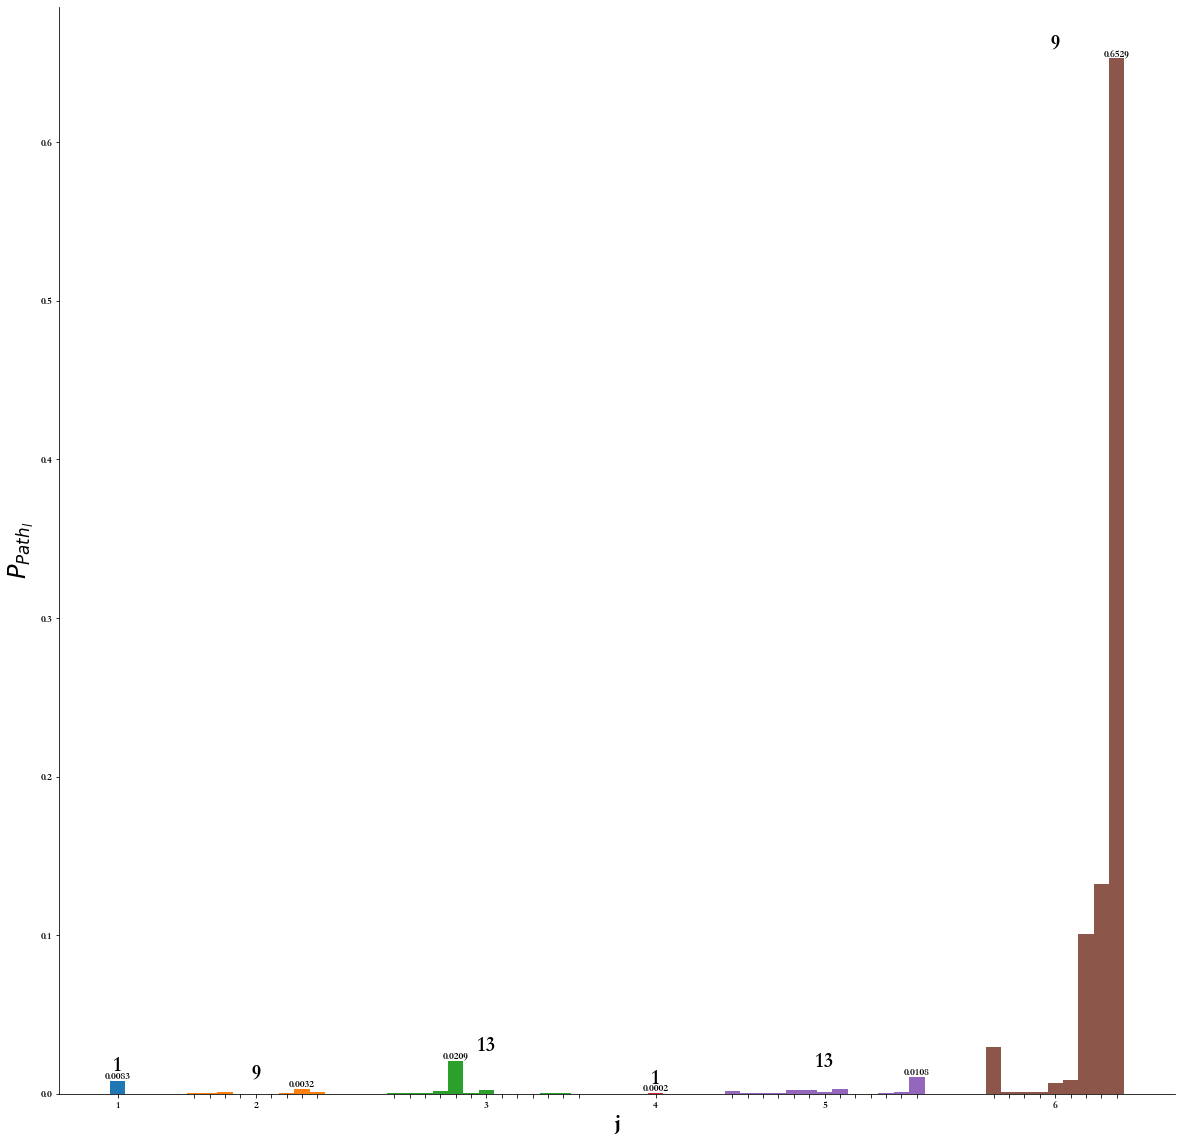

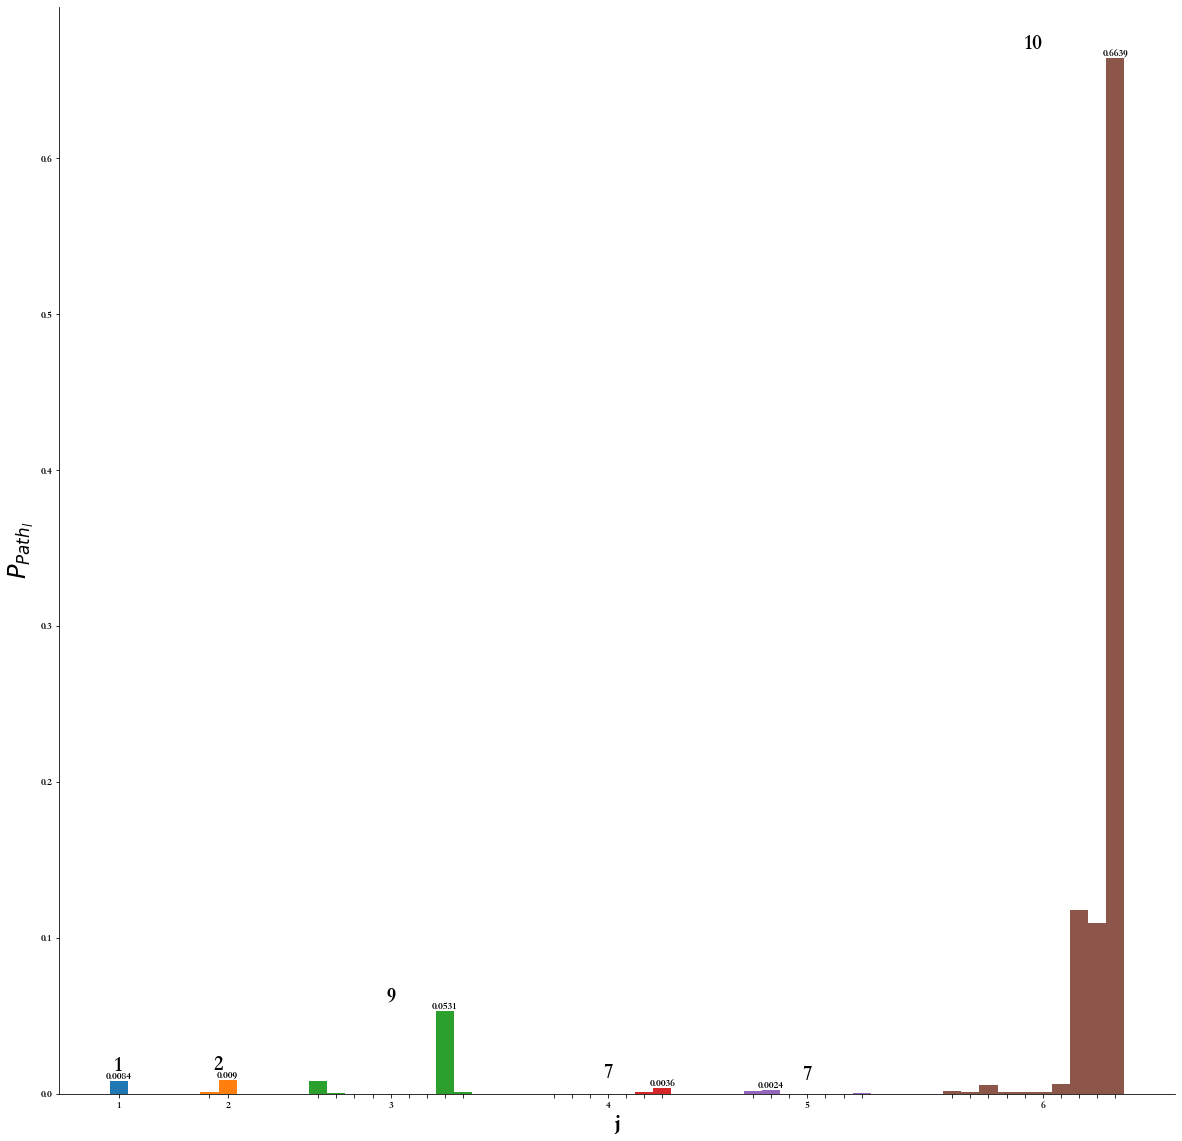

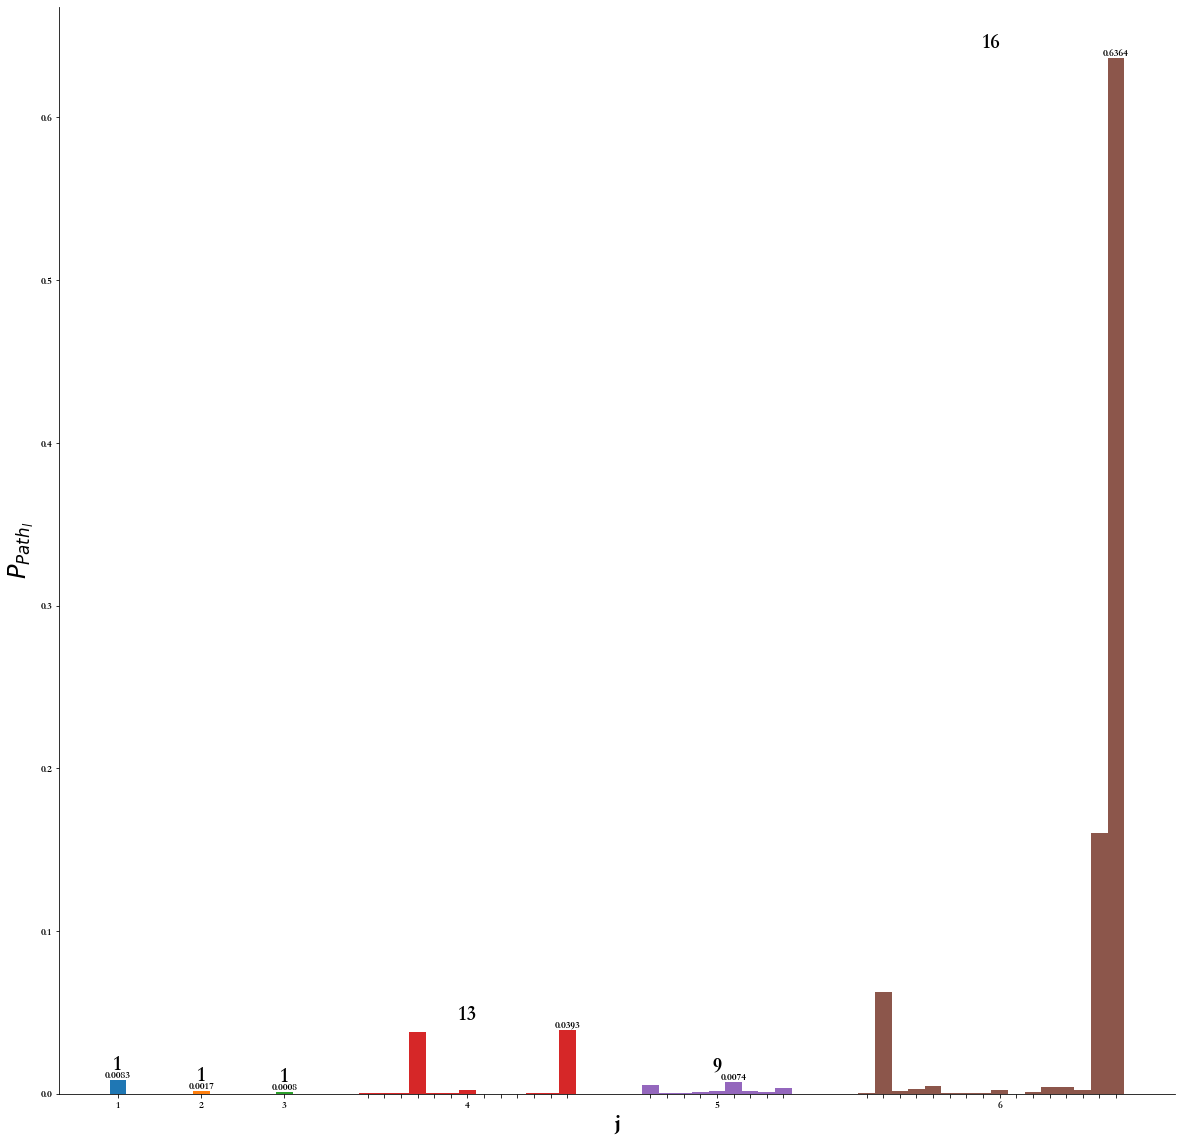

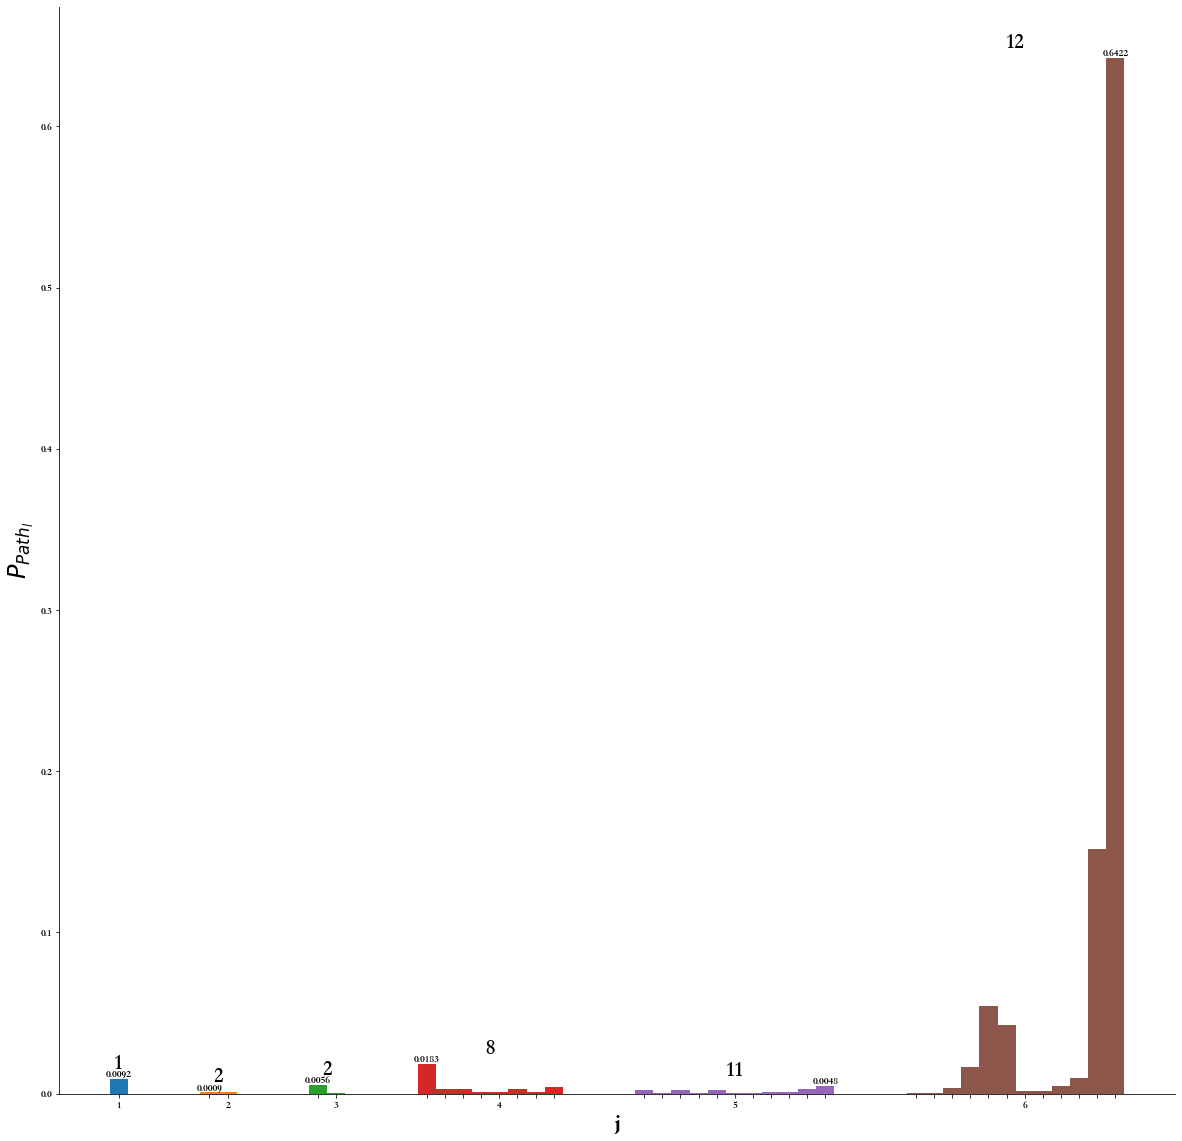

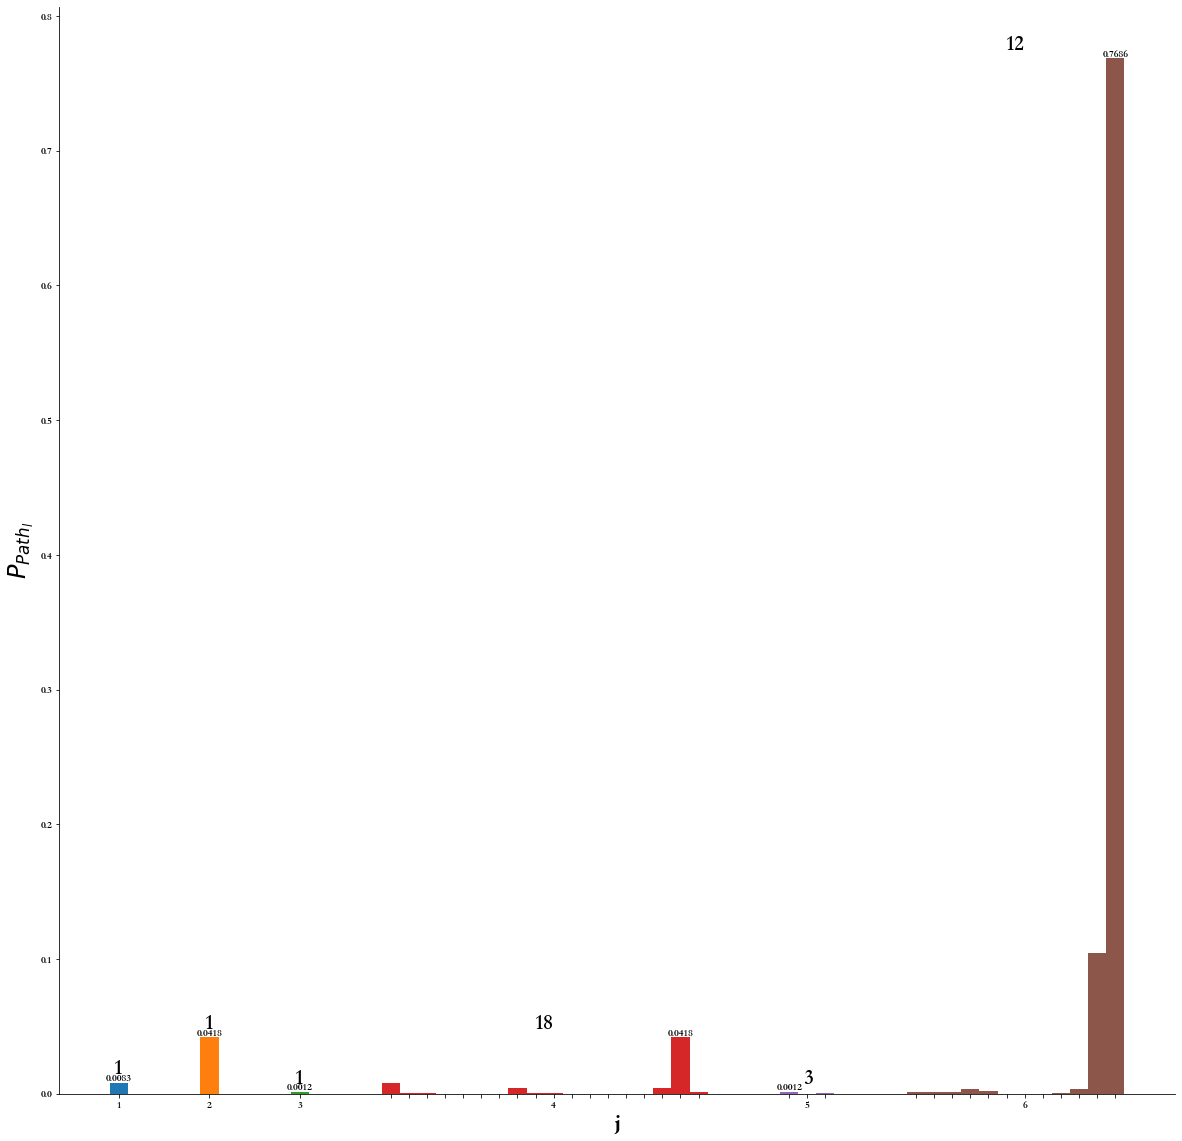

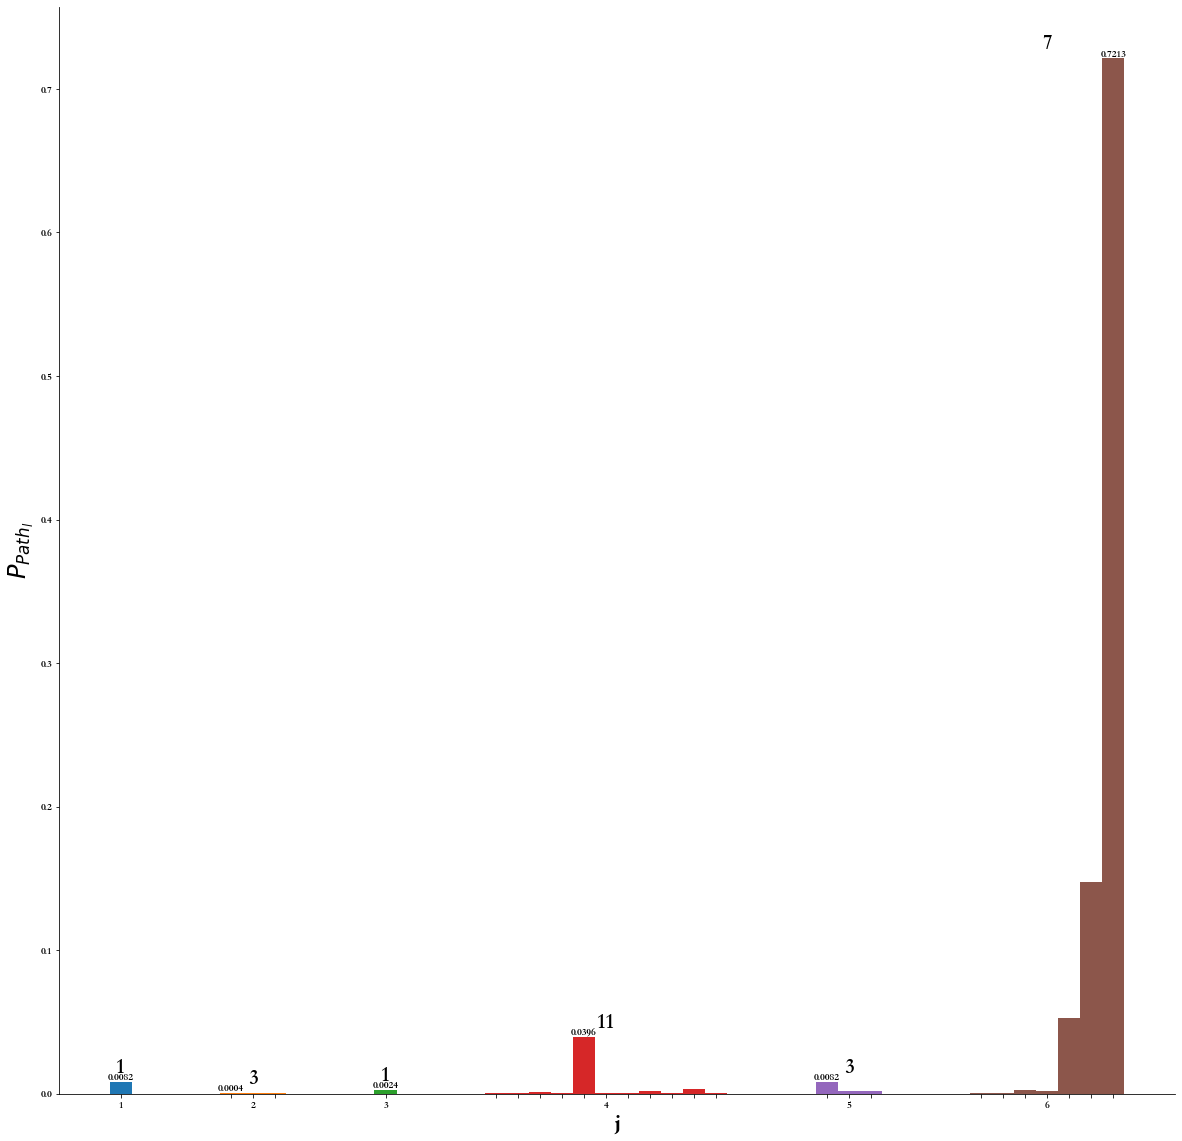

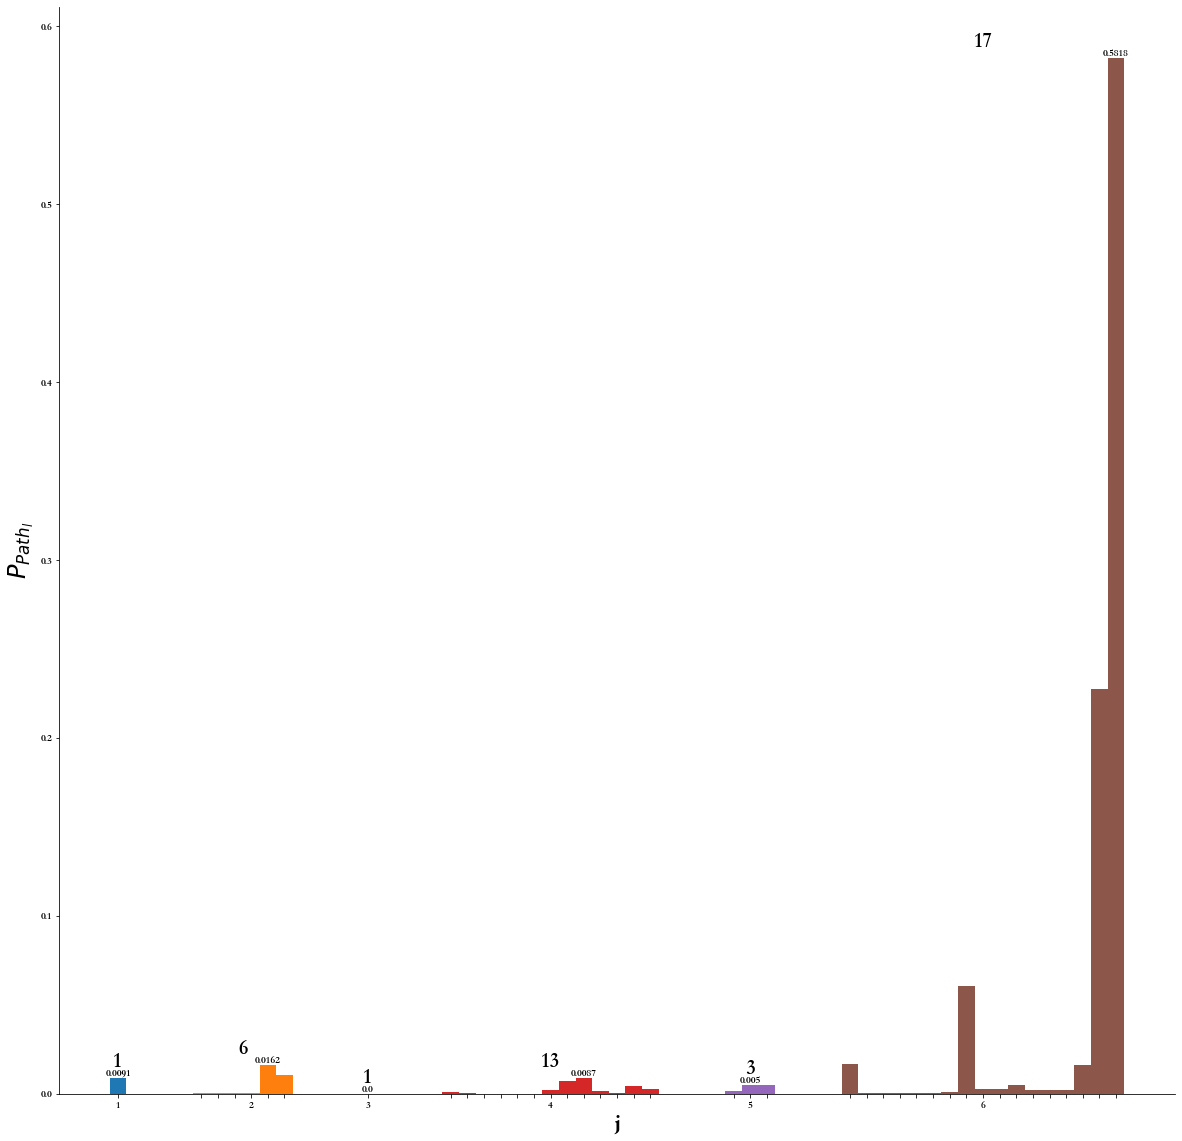

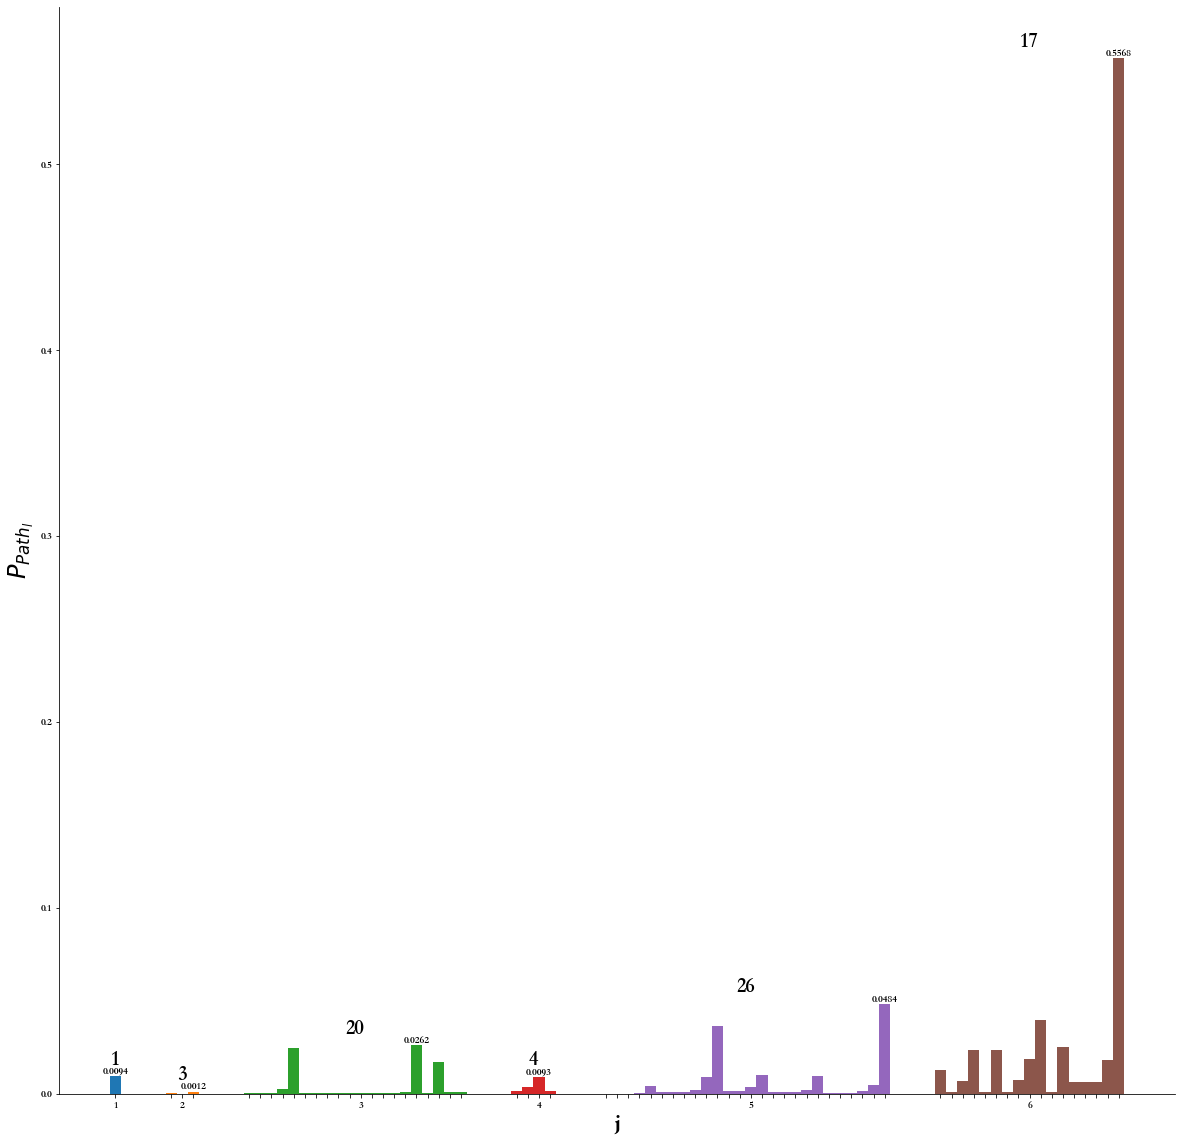

In [29]:
for report in reports:
    report.decision_probability_bar()


<Figure size 936x720 with 0 Axes>

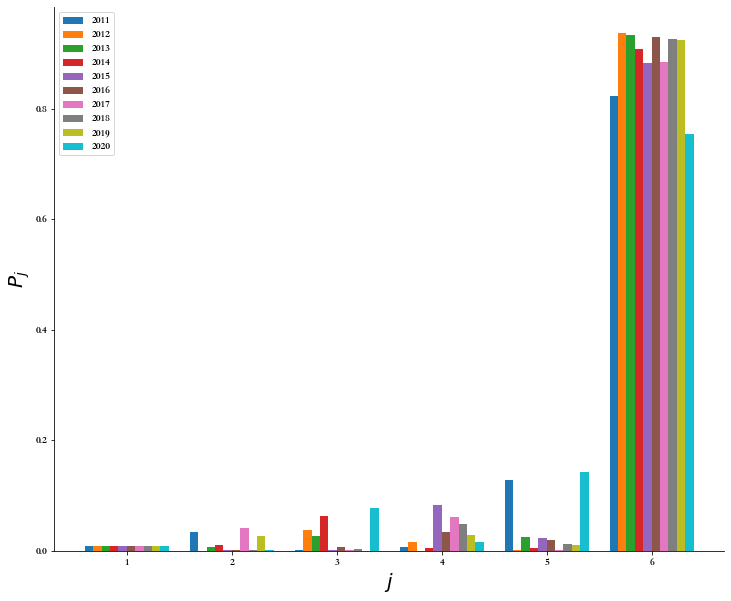

In [30]:
show_hierarchical_risk_bar(reports)
